In [4]:
#Question 1
import yfinance as yf
tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data)

                          Date        Open        High         Low  \
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3777 2025-07-07 00:00:00-04:00  291.369995  296.149994  288.769989   
3778 2025-07-08 00:00:00-04:00  297.000000  304.049988  294.350006   
3779 2025-07-09 00:00:00-04:00  297.549988  300.149994  293.549988   
3780 2025-07-10 00:00:00-04:00  300.049988  310.480011  300.000000   
3781 2025-07-11 00:00:00-04:00  307.890015  314.089996  305.649994   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667  257806500        0.0           

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
print(tesla_revenue)

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [12]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data)

                          Date       Open       High        Low      Close  \
0    2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691666   
1    2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2    2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658002   1.674834   
3    2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
4    2002-02-20 00:00:00-05:00   1.615920   1.662210   1.603296   1.662210   
...                        ...        ...        ...        ...        ...   
5885 2025-07-07 00:00:00-04:00  23.480000  23.480000  22.530001  22.620001   
5886 2025-07-08 00:00:00-04:00  22.709999  22.950001  22.580000  22.750000   
5887 2025-07-09 00:00:00-04:00  22.879999  23.600000  22.530001  23.190001   
5888 2025-07-10 00:00:00-04:00  23.040001  23.330000  23.010000  23.100000   
5889 2025-07-11 00:00:00-04:00  23.129999  24.049999  23.129999  23.330000   

        Volume  Dividends  Stock Splits  
0     76216000       

In [11]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])


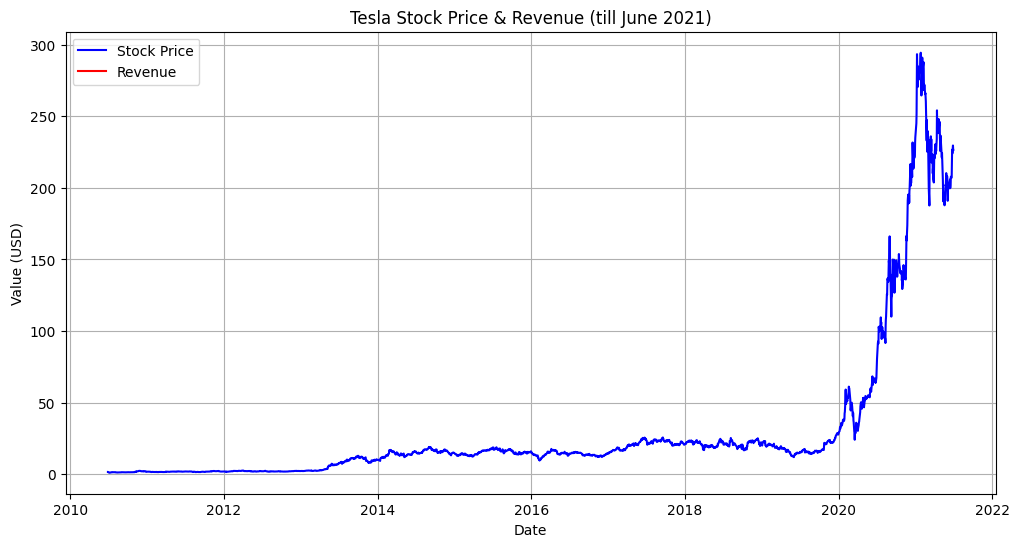

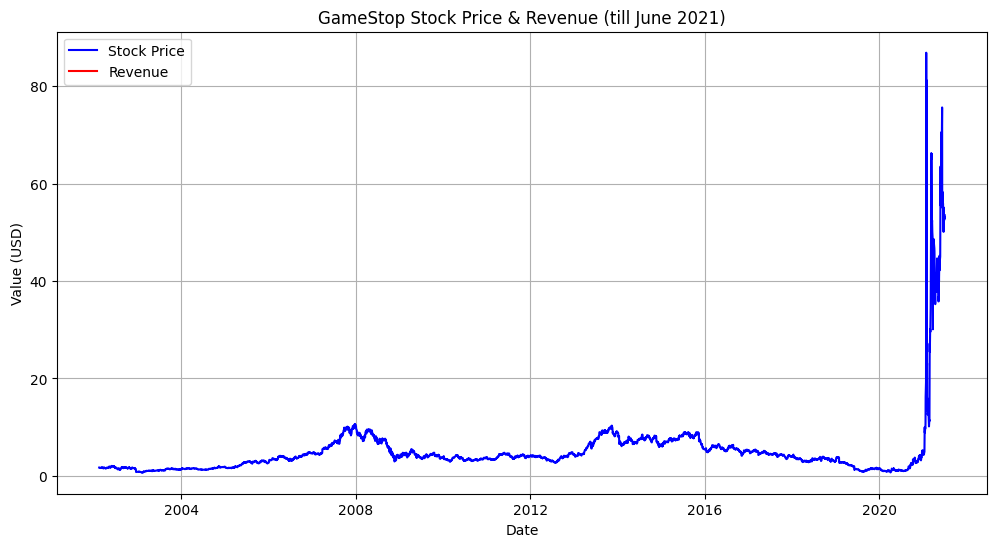

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock_name):

    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])


    stock_data = stock_data[stock_data["Date"] <= "2021-06-30"]
    revenue_data = revenue_data[revenue_data["Date"] <= "2021-06-30"]


    plt.figure(figsize=(12, 6))
    plt.plot(stock_data["Date"], stock_data["Close"], label="Stock Price", color='blue')
    plt.plot(revenue_data["Date"], revenue_data["Revenue"], label="Revenue", color='red')

    plt.title(f"{stock_name} Stock Price & Revenue (till June 2021)")
    plt.xlabel("Date")
    plt.ylabel("Value (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')
make_graph(gme_data, gme_revenue, 'GameStop')

